In [1]:
from skimage import io,transform
import os
import numpy as np
from matplotlib import pyplot as plot

In [2]:
#Image和skimage读图片
img2 = io.imread('./ldh.jpeg')
dice1 = io.imread('./dice1.1.png')
dice2 = io.imread('./dice2.1.png')
dice3 = io.imread('./dice3.1.png')
dice4 = io.imread('./dice4.1.png')
dice5 = io.imread('./dice5.1.png')
dice6 = io.imread('./dice6.1.png')

In [3]:
#Image和skimage读图片
img2 = io.imread('./ldh2.jpeg')
dice1 = io.imread('./dice1.png')
dice2 = io.imread('./dice2.png')
dice3 = io.imread('./dice3.png')
dice4 = io.imread('./dice4.png')
dice5 = io.imread('./dice5.png')
dice6 = io.imread('./dice6.png')

In [11]:
#Image和skimage读图片
img2 = io.imread('./wyz.jpeg')
dice1 = io.imread('./dice/1.jpg')
dice2 = io.imread('./dice/2.jpg')
dice3 = io.imread('./dice/3.jpg')
dice4 = io.imread('./dice/4.jpg')
dice5 = io.imread('./dice/5.jpg')
dice6 = io.imread('./dice/6.jpg')

In [9]:
#Image和skimage读图片
img2 = io.imread('./wyz.jpeg')
dice1 = io.imread('./dice/11.jpg')
dice2 = io.imread('./dice/22.jpg')
dice3 = io.imread('./dice/33.jpg')
dice4 = io.imread('./dice/44.jpg')
dice5 = io.imread('./dice/55.jpg')
dice6 = io.imread('./dice/66.jpg')

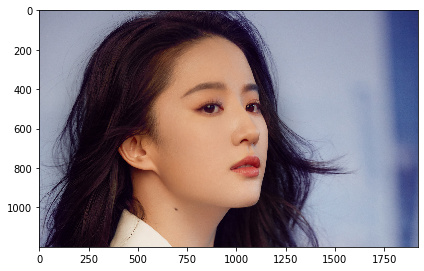

In [48]:
io.imshow(img2)

In [6]:
type(img2)

numpy.ndarray

In [9]:
img2.shape

(1416, 971, 3)

In [8]:
img2.size

180000

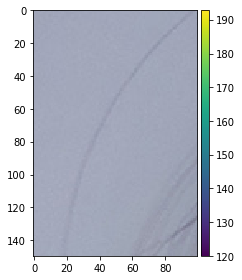

In [50]:
cropped = img2[150:300,100:200]
io.imshow(cropped)

In [10]:
width  = img2.shape[0]
height = img2.shape[1]
(width/20, height/20)

(70.8, 48.55)

In [27]:
img2[0][0]

array([206, 200, 188], dtype=uint8)

total dices: %d, %d, %d 82 55 4584


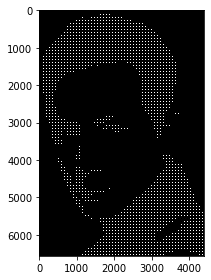

(82.9, 55.3)


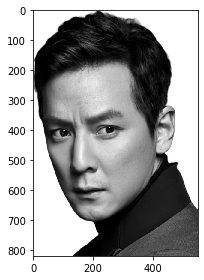

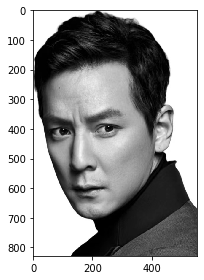

In [12]:

def image_from_dice(dice, reversed=True):
    if reversed:
        return [dice1, dice2,dice3,dice4,dice5, dice6][dice - 1]
    return [dice1, dice2,dice3,dice4,dice5, dice6][6 - dice]
def rgb2gray( argb):
#     var _alpha = (argb >> 24) & 0xFF;
#     var _red = (argb >> 16) & 0xFF
#     var _green = (argb >> 8 ) & 0xFF
#     var _blue = (argb) & 0xFF
    return int(0.3*argb[0] + 0.59*argb[1] + 0.11*argb[2])

def patch2dice(patch, width, height):
    total = 0
    for i in range(width):
        for j in range(height):
            total += rgb2gray(patch[i][j])
    return six_step_gray(int(total/width/height))
def six_step_gray(x):

    if (0 <= x and x <= 41):
        return 1;
    if (41 < x and x <= 83):
        return 2;
    if (83 < x and x <= 124):
        return 3;
    if (124 < x and x <= 165):
        return 4;
    if (165 < x and x <= 206):
        return 5;
    if (206 < x and x <= 247):
        return 6;
    else:
        return 6;

def diceit(source,output="test.png", x_size=20,y_size=20):
    img2 = source
    width  = img2.shape[0]
    height = img2.shape[1]
    print("total dices: %d, %d, %d", int(width/x_size), int(height/y_size), int(width*height/x_size/y_size))
    mapped_imgs = []
    origin_imgs = []
    for x in range(int(width/x_size)):
        xline_imgs = []
        xline_imgs_orig = []
        for y in range(int(height/y_size)):
            cropped = img2[int(x)*x_size:int(x)*x_size+x_size, int(y)*y_size:int(y)*y_size+y_size]
            dice = patch2dice(cropped, x_size, y_size)
            xline_imgs.append(image_from_dice(dice))
            xline_imgs_orig.append(cropped)
    #         print(dice)
        merged = np.concatenate(xline_imgs,axis=1)
        merged_orig = np.concatenate(xline_imgs_orig, axis=1)
    #     io.imshow(merged_orig)
    #     io.show()
        mapped_imgs.append(merged)
        origin_imgs.append(merged_orig)

    io.imshow(np.concatenate(mapped_imgs))
    io.show()
    print((width/x_size, height/y_size))
    io.imsave(output, np.concatenate(mapped_imgs))
    io.imshow(np.concatenate(origin_imgs))
    io.show()
    io.imshow(img2)
    io.show()
#     print(xline_imgs)

img2 = io.imread('./wyz3.gray.jpeg')
diceit(img2,"wyz3.gray.dice.png",10,10)
        